In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
zData=pd.read_csv("/content/zomato.csv",encoding='Latin-1')
cData=pd.read_excel("/content/Country-Code.xlsx")

In [7]:
zData.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [9]:
cData.columns

Index(['Country Code', 'Country'], dtype='object')

In [12]:
final_df=pd.merge(zData,cData,on='Country Code')

In [13]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [19]:
Cindex=final_df['Country'].value_counts().index
Cvalues=final_df['Country'].value_counts().values

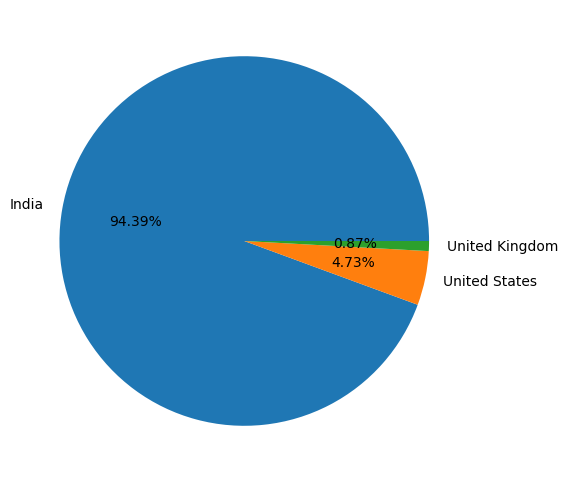

In [21]:
plt.figure(figsize=(8,6))
plt.pie(Cvalues[:3],labels=Cindex[:3],autopct='%1.2f%%')
plt.show()

The Maximum data or Transaction are from INDIA.

In [25]:
CRating=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Count'})

In [32]:
CRating

,Aggregate rating,Rating color,Rating text,Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


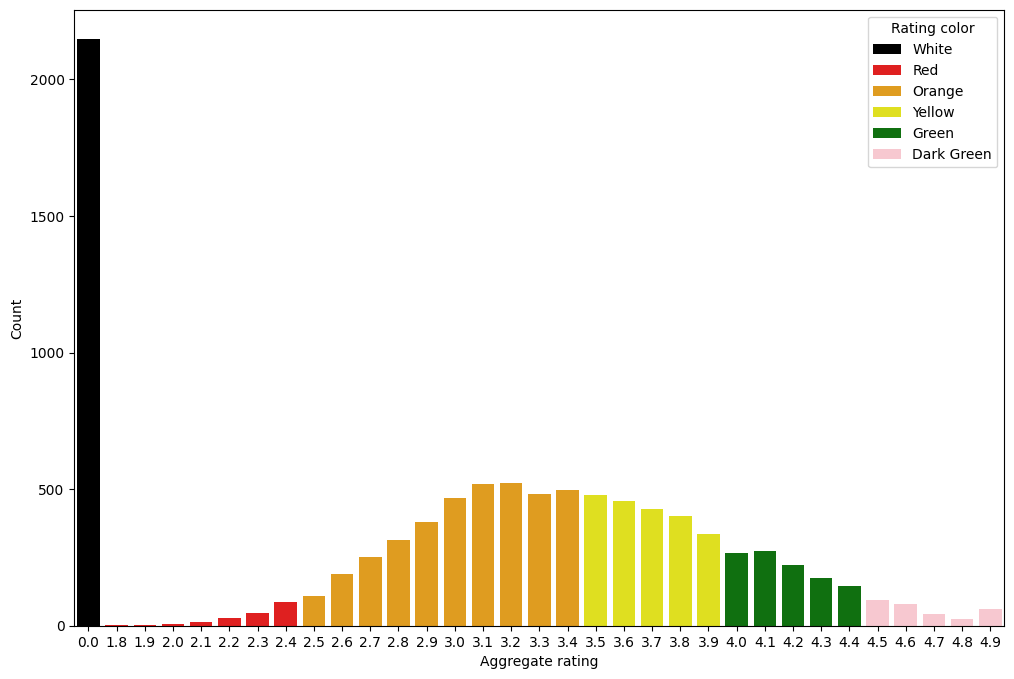

In [34]:
##White-> Black, Dark Green->Pink
plt.figure(figsize=(12,8))
sns.barplot(x='Aggregate rating',y='Count',data=CRating,hue='Rating color',palette=['Black','Red','Orange','Yellow','Green','Pink'])
plt.show()

->>Zero Rating Count Is Very Hight---
->> Max person gave the rating between 2.8----3.9

In [36]:
x=final_df[final_df['Aggregate rating']==0]

In [37]:
x['Country'].value_counts()

,count
Country,
India,2139
Brazil,5
United States,3
United Kingdom,1


The Country which gave the zero Rating

In [44]:
final_df[final_df['Has Online delivery']=='Yes'].Country.value_counts()

,count
Country,
India,2423
UAE,28


There are only two Countries where Zomato is delivery online

In [46]:
Ciindex=final_df['City'].value_counts().index
Civalues=final_df['City'].value_counts().values

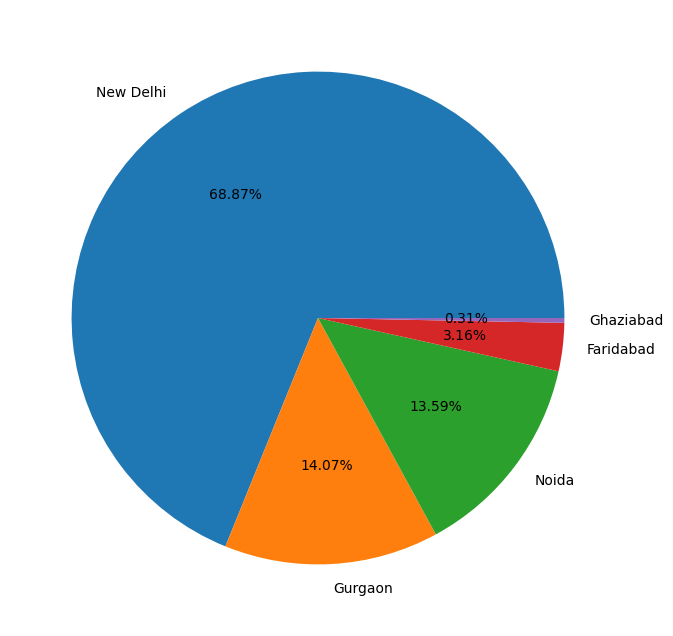

In [51]:
plt.figure(figsize=(10,8))
plt.pie(Civalues[:5],labels=Ciindex[:5],autopct='%1.2f%%')
plt.show()

--->>Maximum Transaction are from Delhi(India)